# AFM and XRD

In [1]:
%load_ext autoreload
%autoreload 2
import os
import re
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../../src/")
from m3_learning.viz.style import set_style
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.viz.layout import layout_fig, labelfigs
from m3_learning.RHEED.AFM import visualize_afm_image, afm_substrate
from m3_learning.RHEED.XRD import plot_xrd, plot_rsm

# from be.dataset import BE_Dataset
printing = printer(basepath = '../Figures/2.AFM_XRD/')
set_style("printing")

printing set for seaborn


## Sample 1 - treated_213nm

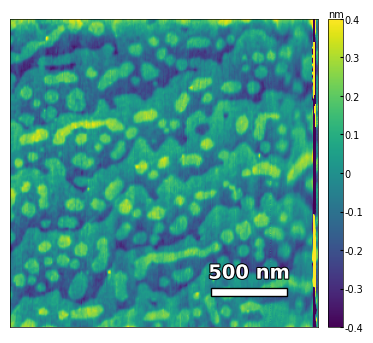

In [2]:
img2 = np.loadtxt('./Data/AFM/treated_213nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict,)

In [5]:
img3 = np.loadtxt('./Data/AFM/treated_213nm-substrate-tilted.txt')[:256]
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=-50, demo=False)
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=1e-5, width=2, xz_angle=3, demo=False)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=3, prominence=1e-3, width=2, style='simple', fixed_height=3.91e-10, std_range=1, demo=False)

Step height = 3.91e-10 +- 0.00e+00
Step width = 2.13e-07 +- 8.87e-08
Miscut = 0.131° +- 0.074°


## Sample 2 - treated_81nm:

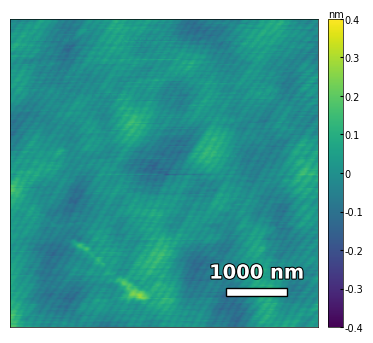

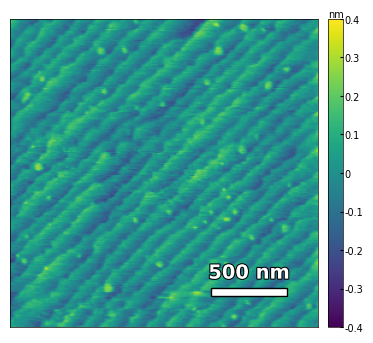

In [6]:
img1 = np.loadtxt('./Data/AFM/treated_81nm-substrate.txt')[:256]
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

img2 = np.loadtxt('./Data/AFM/treated_81nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

In [ ]:
img3 = np.loadtxt('./Data/AFM/treated_81nm-substrate.txt')[:256]
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=-56, demo=False)
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=1e-13, width=1.5, xz_angle=0, demo=False)
# step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, fixed_height=3.91e-5, demo=False)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=0, prominence=1e-13, width=1.5, 
                                                    style='simple', fixed_height=3.91e-10, std_range=1, demo=False)


## Sample 3 - untreated_162nm

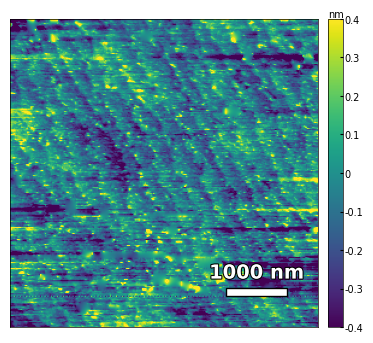

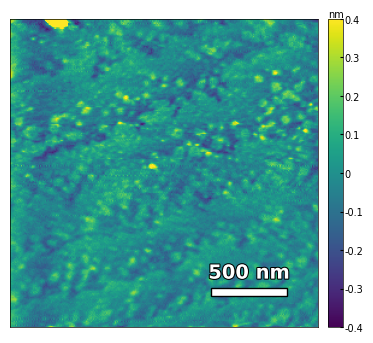

In [7]:
img1 = np.loadtxt('./Data/AFM/untreated_162nm-substrate.txt')[:256]
img1 = np.rot90(img1, k=2)
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

img2 = np.loadtxt('./Data/AFM/untreated_162nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

In [8]:
img3 = np.loadtxt('./Data/AFM/untreated_162nm-substrate-tilted.txt')[:256]
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=65, demo=False)
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=1e-13, width=2, xz_angle=2, demo=False)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=2, prominence=1e-13, width=2, style='simple', fixed_height=3.91e-10/2, std_range=1, demo=False)

Step height = 1.95e-10 +- 0.00e+00
Step width = 1.62e-07 +- 8.27e-08
Miscut = 0.090° +- 0.135°


## Summary of XRD and RSM

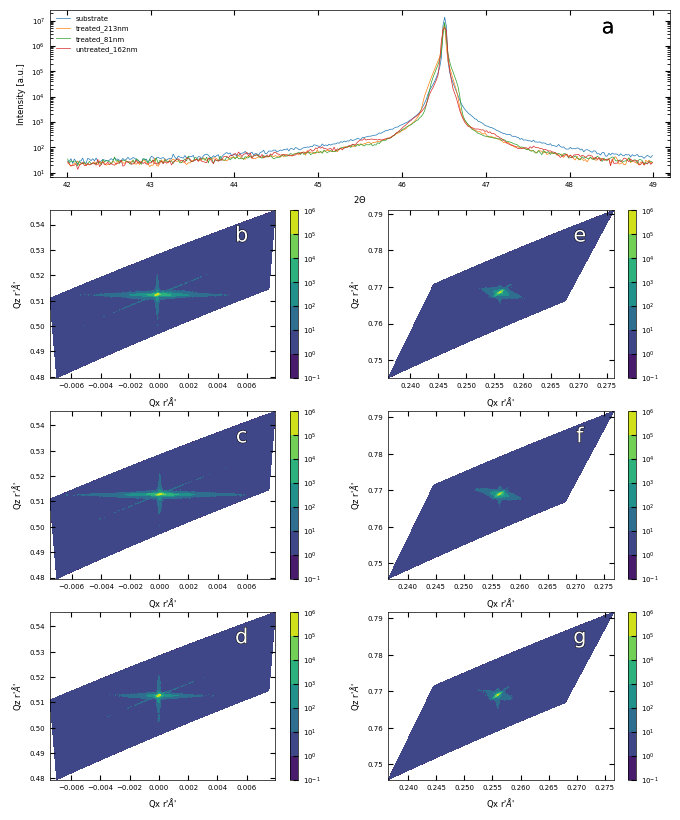

Fig. S2 a X-ray Diffraction result for a typical SrTiO3 substrate and samples. b, c, d Reciprocal Space Mapping results in (002) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively. e, f, g Reciprocal Space Mapping results in (103) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively.


In [9]:
fig = plt.figure(figsize=(8,10))

ax0 = plt.subplot2grid((4, 2), (0, 0), colspan=2)  # colspan=2 means the plot spans 2 columns
files = ['./Data/XRD/substrate-XRD_42_49.xrdml', './Data/XRD/treated_213nm-XRD_42_29.xrdml', './Data/XRD/treated_81nm-XRD_42_29.xrdml', './Data/XRD/untreated_162nm-XRD_42_29.xrdml']
labels = ['substrate', 'treated_213nm', 'treated_81nm', 'untreated_162nm']
plot_xrd(ax0, files, labels, diff=None, xrange=(41.8, 49.2))
labelfigs(ax0, 0, loc='tr', size=15, style='b', inset_fraction=(0.8, 0.1))

files_002 = ['./Data/XRD/treated_213nm-RSM_002.xrdml', './Data/XRD/treated_81nm-RSM_002.xrdml', './Data/XRD/untreated_162nm-RSM_002.xrdml']
for i, file in enumerate(files_002):
    ax = plt.subplot2grid((4, 2), (i+1, 0))
    plot_rsm(ax, file)
    labelfigs(ax, i+1, loc='tr', size=15)

files_103 = ['./Data/XRD/treated_213nm-RSM_103.xrdml', './Data/XRD/treated_81nm-RSM_103.xrdml', './Data/XRD/untreated_162nm-RSM_103.xrdml']
for i, file in enumerate(files_103):
    ax = plt.subplot2grid((4, 2), (i+1, 1))
    plot_rsm(ax, file)
    labelfigs(ax, i+4, loc='tr', size=15)
plt.show() 

print(f'\033[1mFig. S2 a\033[0m X-ray Diffraction result for a typical SrTiO3 substrate and samples. \
\033[1mb, c, d\033[0m Reciprocal Space Mapping results in (002) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively. \
\033[1me, f, g\033[0m Reciprocal Space Mapping results in (103) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively.')

In [ ]:
fig = plt.figure(figsize=(8,10))

ax0 = plt.subplot2grid((4, 2), (0, 0), colspan=2)  # colspan=2 means the plot spans 2 columns
files = ['./Data/XRD/substrate-XRD_42_49.xrdml', './Data/XRD/treated_213nm-XRD_42_29.xrdml', './Data/XRD/treated_81nm-XRD_42_29.xrdml', './Data/XRD/untreated_162nm-XRD_42_29.xrdml']
labels = ['substrate', 'treated_213nm', 'treated_81nm', 'untreated_162nm']
plot_xrd(ax0, files, labels, diff=None, xrange=(41.8, 49.2))
# labelfigs(ax0, 0, loc='tr', size=15, style='b', inset_fraction=(0.8, 0.1))

files_002 = ['./Data/XRD/treated_213nm-RSM_002.xrdml', './Data/XRD/treated_81nm-RSM_002.xrdml', './Data/XRD/untreated_162nm-RSM_002.xrdml']
for i, file in enumerate(files_002):
    ax = plt.subplot2grid((4, 2), (i+1, 0))
    plot_rsm(ax, file)
    # labelfigs(ax, i+1, loc='tr', size=15)

files_103 = ['./Data/XRD/treated_213nm-RSM_103.xrdml', './Data/XRD/treated_81nm-RSM_103.xrdml', './Data/XRD/untreated_162nm-RSM_103.xrdml']
for i, file in enumerate(files_103):
    ax = plt.subplot2grid((4, 2), (i+1, 1))
    plot_rsm(ax, file)
    # labelfigs(ax, i+4, loc='tr', size=15)
plt.savefig('XRD_no_labels.svg')
plt.show() 